<a href="https://colab.research.google.com/github/rezakhanahmadi342341/projects/blob/main/Airline_ArrDelay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import zipfile
from sklearn.preprocessing import Normalizer

In [373]:
with zipfile.ZipFile('/content/Airline_Delay.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [389]:
data = pd.read_csv('/content/DelayedFlights.csv')

In [390]:
objects = data.select_dtypes(exclude='object')

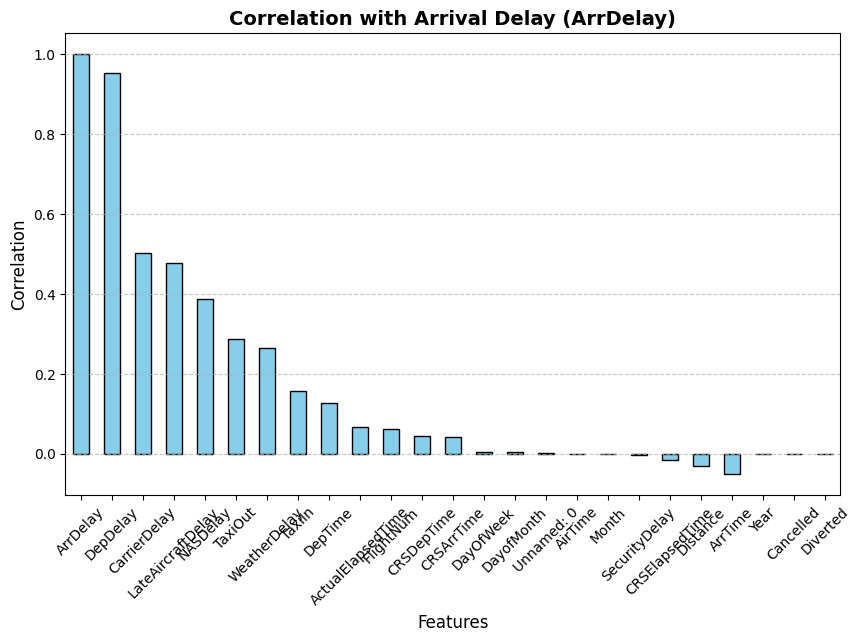

In [393]:

correlation = objects.corr()['ArrDelay'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
correlation.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Correlation with Arrival Delay (ArrDelay)', fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


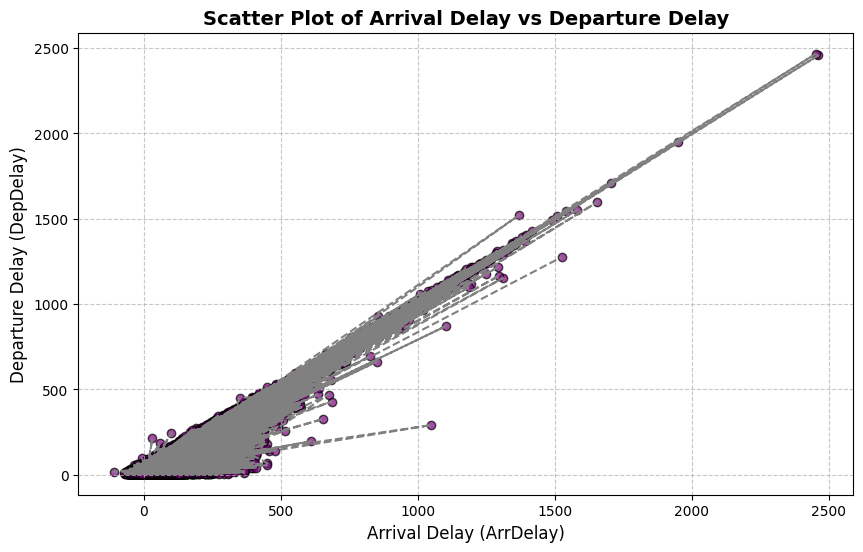

In [396]:

# Scatter plot between 'ArrDelay' and 'DepDelay'
plt.figure(figsize=(10, 6))
plt.scatter(data['ArrDelay'], data['DepDelay'], c='purple', alpha=0.7, edgecolor='black')


plt.title('Scatter Plot of Arrival Delay vs Departure Delay', fontsize=14, fontweight='bold')
plt.xlabel('Arrival Delay (ArrDelay)', fontsize=12)
plt.ylabel('Departure Delay (DepDelay)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.plot(data['ArrDelay'], data['DepDelay'], color='gray', linestyle='--')
plt.show()


In [376]:
objects = objects.drop('ArrDelay', axis=1)
y = data['ArrDelay']

In [382]:
imputer = SimpleImputer(strategy='mean')
objects_imputed = imputer.fit_transform(objects)
objects = pd.DataFrame(objects_imputed, columns=objects.columns)

imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1))
y = pd.Series(y_imputed.flatten(), name='ArrDelay')

nor = Normalizer()
objec = nor.fit_transform(objects)
objects_df = pd.DataFrame(objec, columns=objects.columns)
data = objects_df
x = objects

In [383]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [397]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [398]:
# Calculate the model's accuracy or score on the test set
test_score = model.score(x_test, y_test)

print(f"Test Score: {test_score:.4f}")

Test Score: 0.9840


---
#Test Score: **0.9840%** ⛳
---


